## 데이터 파악

In [374]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam
from torchvision import datasets, transforms
import torchvision.models as models

import matplotlib.pyplot as plt

In [375]:
# 난수 생성기가 항상 일정한 값을 출력하게 하기 위해 seed 고정
random_seed = 2021
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)

In [376]:
DATASET_PATH = os.path.join('/USER/traffic/data/data')

In [377]:
train = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
train

날짜  시간      10     100    101    120    121   140     150   160  \
0     20200101   0   83247   19128   2611   5161   1588   892   32263  1636   
1     20200101   1   89309   19027   3337   5502   1650  1043   35609  1644   
2     20200101   2   66611   14710   2970   4631   1044   921   26821  1104   
3     20200101   3   53290   13753   2270   4242   1021   790   21322   909   
4     20200101   4   52095   17615   2406   3689   1840   922   22711  1354   
...        ...  ..     ...     ...    ...    ...    ...   ...     ...   ...   
3274  20200517  19  311727  101285  10085  30637  10060  8749  148935  6801   
3275  20200517  20  305354   91426   8607  26021   8095  7198  136503  6147   
3276  20200517  21  306008   75113   6325  19933   5711  4494  129412  5134   
3277  20200517  22  237447   49498   4209  12145   3891  2718   96698  3526   
3278  20200517  23  150312   27410   2350   6406   1803  1614   55788  1849   

      ...  1020   1040   1100   1200  1510   2510  3000   4510   5510   6000  
0     ...  1311   3482  11299   7072  1176   3810   748   3920   2133   3799  
1     ...  1162   3849  13180   8771  1283   3763   782   3483   2057   4010  
2     ...   768   2299   7986   5426  1536   3229   491   2634   1526   3388  
3     ...   632   1716   5703   3156  1104   2882   431   2488   1268   3686  
4     ...   875   2421   5816   2933  1206   2433   499   2952   1927   5608  
...   ...   ...    ...    ...    ...   ...    ...   ...    ...    ...    ...  
3274  ...  6726  15431  25597  14292  9300  22238  3786  16936  10729  20194  
3275  ...  5501  15378  24661  14747  8239  20604  3203  15018   9767  17962  
3276  ...  4216  12558  22781  14081  6392  17937  2447  12403   7825  14031  
3277  ...  2578   8870  16640  11066  4427  11955  1495   7507   5387   8889  
3278  ...  1377   5021  10058   7139  2250   6844   735   4116   3046   4606  

[3279 rows x 37 columns]

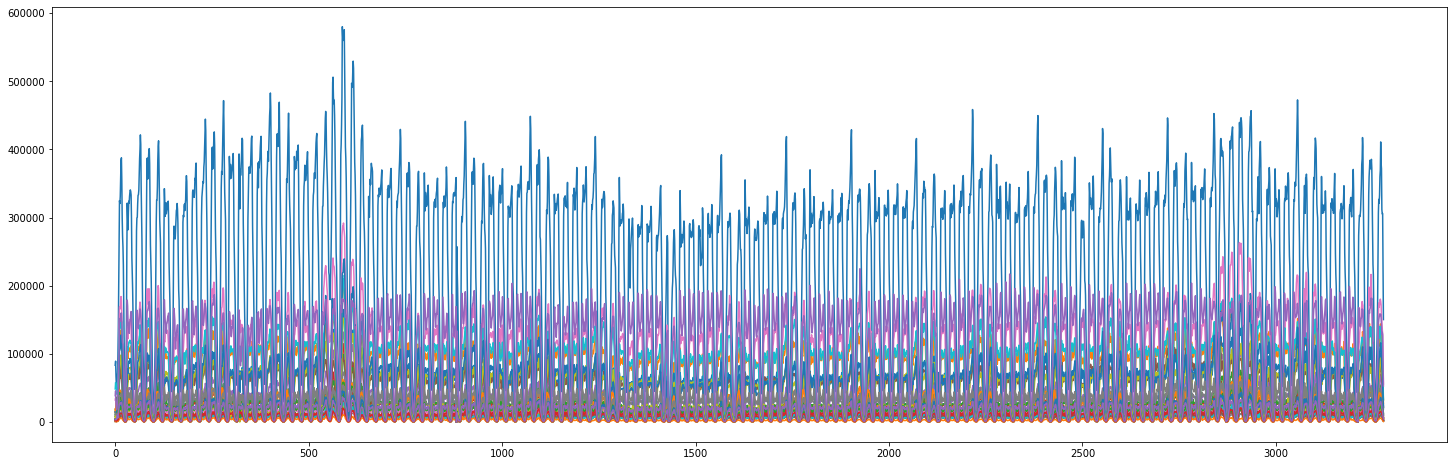

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))
plt.plot(train.iloc[:, 2:])

In [6]:
train.iloc[2847, 0:2]

날짜    20200430
시간           0
Name: 2847, dtype: int64

([<matplotlib.axis.XTick at 0x7f62822408e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

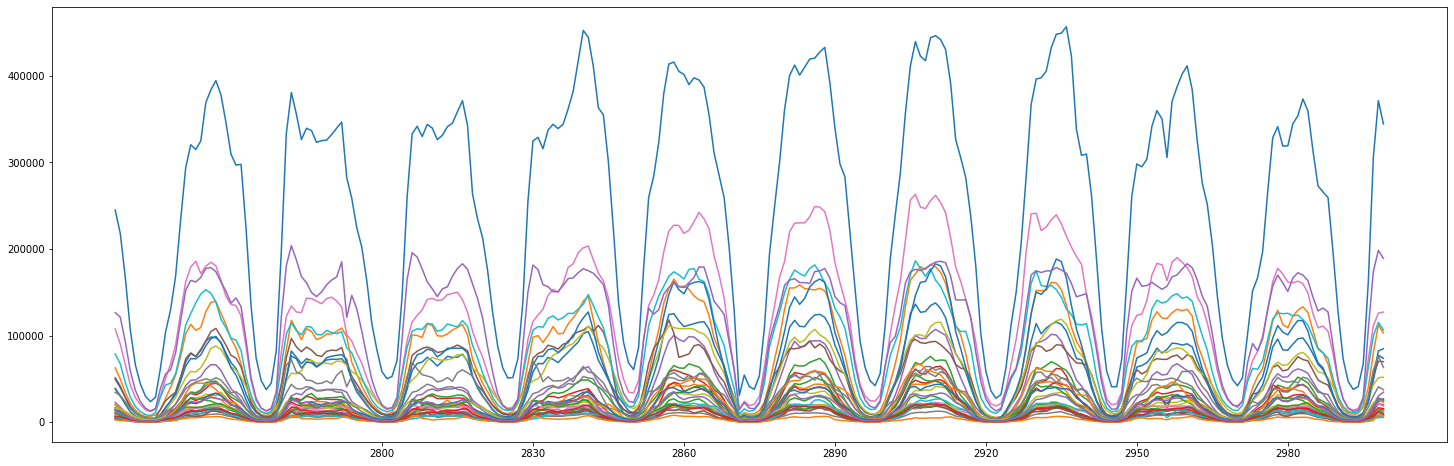

In [7]:
plt.figure(figsize=(25, 8))
plt.plot(train.iloc[2747:3000, 2:])
plt.xticks(range(2800,3000,30))



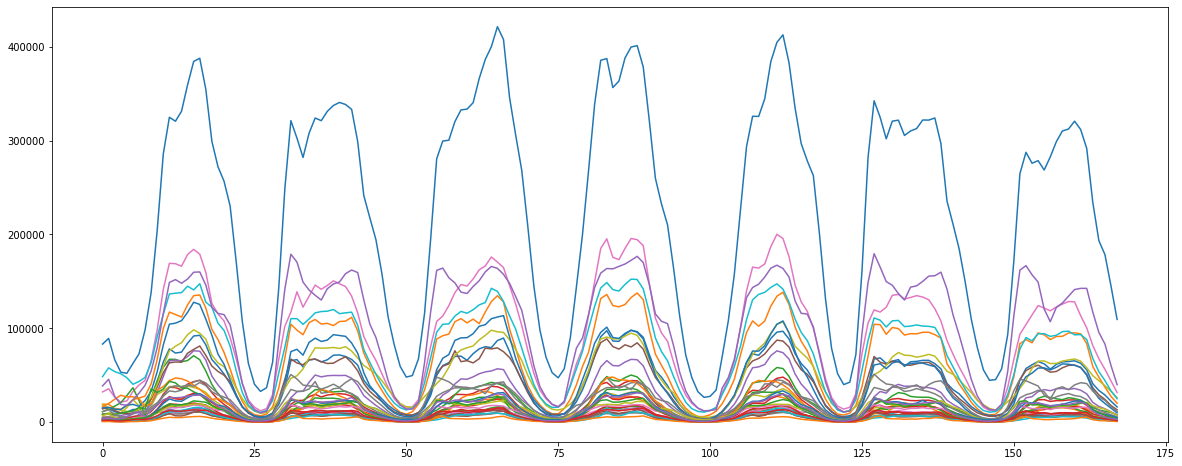

In [8]:
plt.figure(figsize=(20, 8))
plt.plot(train.iloc[:168, 2:])  # 일단위로 주기 보임, 도로들끼리도 어느정도 비슷한 것 같음

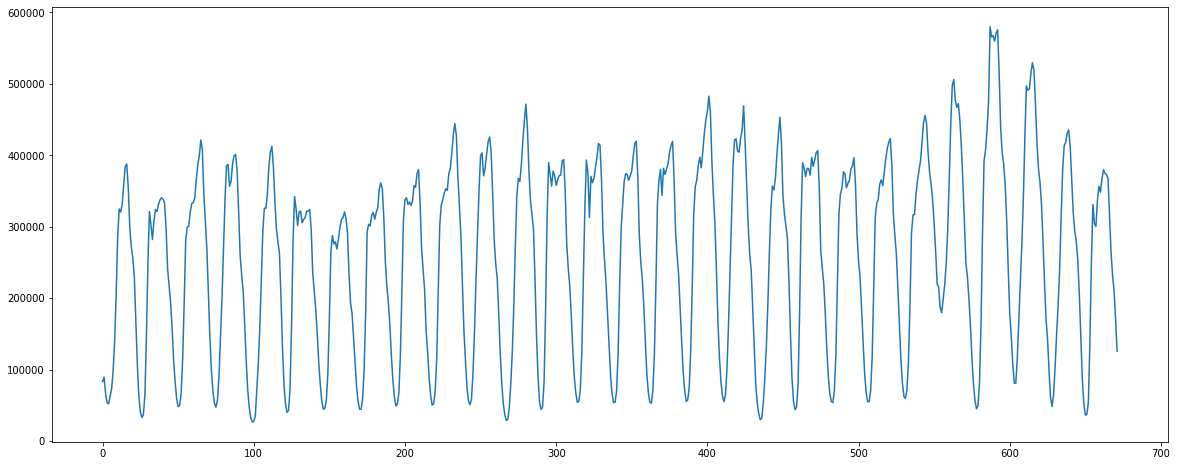

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(train.iloc[:672, 2])  # 설날 통행량 엄청 많음

In [11]:
valid = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
valid

날짜  시간      10    100    101    120   121   140     150   160  ...  \
0    20200511   0   77968  14429   1233   4021   981   881   28672  1064  ...   
1    20200511   1   48679   9136    823   2618   654   572   17722   672  ...   
2    20200511   2   33773   8199    578   2188   392   502   14464   579  ...   
3    20200511   3   41511   9986    726   2817   555   646   17793   650  ...   
4    20200511   4   78680  19509   1463   4720   825  1088   35125   997  ...   
..        ...  ..     ...    ...    ...    ...   ...   ...     ...   ...  ...   
331  20200524  19  314226  98345  10625  28618  8316  6684  141675  6619  ...   
332  20200524  20  300001  87871   8226  22706  6981  5743  142933  6295  ...   
333  20200524  21  304150  71126   6002  18317  4939  3779  133110  4781  ...   
334  20200524  22  236751  44947   3575  11455  3135  2536   98582  3267  ...   
335  20200524  23  143609  26137   2242   6166  1609  1391   54633  1899  ...   

     1020   1040   1100   1200  1510   2510  3000   4510   5510   6000  
0     637   2604   5239   4168  1155   3596   337   2262   1608   2337  
1     353   1870   3359   2558  1002   2157   257   1425   1018   1810  
2     345   1499   2646   2022   876   1959   232   1155    927   1530  
3     390   1730   3398   1967   912   2462   281   1477    959   1882  
4     679   2958   7369   4120  1569   4568   577   3155   1871   3656  
..    ...    ...    ...    ...   ...    ...   ...    ...    ...    ...  
331  8254  16118  23304  14082  8447  21694  2180  15746  10903  21014  
332  5225  15297  21919  14526  7332  19732  1990  14096  10028  17787  
333  4072  12685  21135  14403  5443  16967  1359  11670   7963  14041  
334  2489   8093  14427  10914  3861  11397   859   7270   5194   8230  
335  1343   4686   8732   6986  2161   6487   410   3963   2686   4690  

[336 rows x 37 columns]

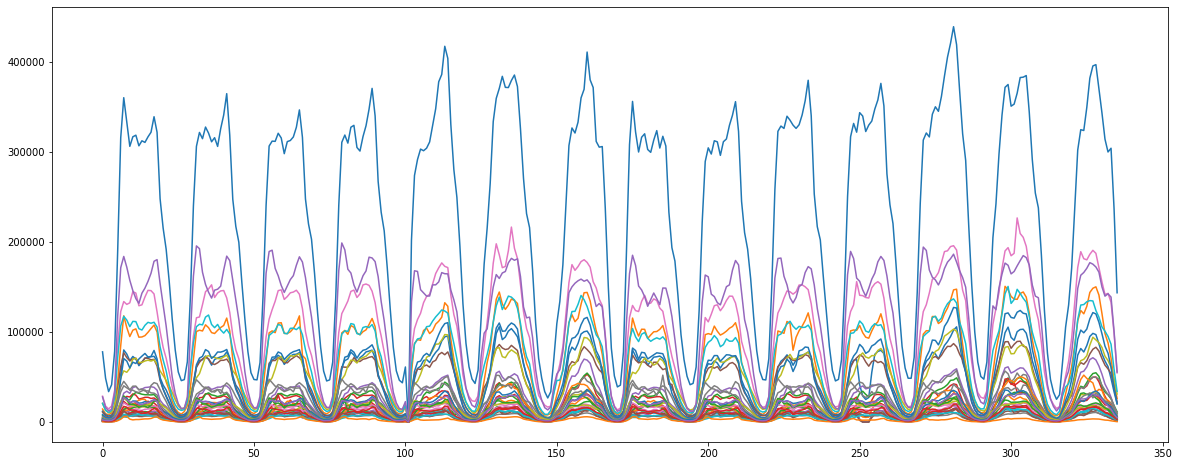

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(valid.iloc[:, 2:])

In [13]:
test = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))
test

날짜  시간     10    100   101   120   121   140    150   160  ...  \
0    20200518   0  82065  15172  1500  3294  1086   962  28931  1103  ...   
1    20200518   1  51248   9840   813  2356   696   546  17888   720  ...   
2    20200518   2  39026   7894   760  2413   408   549  13357   498  ...   
3    20200518   3  40993  10137   780  2701   420   741  15544   532  ...   
4    20200518   4  77863  19603  1276  5019   968  1160  32101   968  ...   
..        ...  ..    ...    ...   ...   ...   ...   ...    ...   ...  ...   
331  20200531  19   -999   -999  -999  -999  -999  -999   -999  -999  ...   
332  20200531  20   -999   -999  -999  -999  -999  -999   -999  -999  ...   
333  20200531  21   -999   -999  -999  -999  -999  -999   -999  -999  ...   
334  20200531  22   -999   -999  -999  -999  -999  -999   -999  -999  ...   
335  20200531  23   -999   -999  -999  -999  -999  -999   -999  -999  ...   

     1020  1040  1100  1200  1510  2510  3000  4510  5510  6000  
0     618  2790  5147  4331  1329  3665   404  2242  1619  2314  
1     430  1864  3269  2561   921  2081   272  1390  1003  1766  
2     322  1313  2765  1931   920  1764   228  1136   922  1309  
3     326  1766  3320  2060   892  2447   337  1495   975  1912  
4     669  2914  6986  3911  1368  4380   513  2940  1758  3629  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
331  -999  -999  -999  -999  -999  -999  -999  -999  -999  -999  
332  -999  -999  -999  -999  -999  -999  -999  -999  -999  -999  
333  -999  -999  -999  -999  -999  -999  -999  -999  -999  -999  
334  -999  -999  -999  -999  -999  -999  -999  -999  -999  -999  
335  -999  -999  -999  -999  -999  -999  -999  -999  -999  -999  

[336 rows x 37 columns]

In [14]:
!pip install pystan==2.19.1.1

In [15]:
!pip install fbprophet==0.7.0

In [16]:
!pip install plotly

In [378]:
from fbprophet import Prophet

In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      3279 non-null   int64
 1   시간      3279 non-null   int64
 2   10      3279 non-null   int64
 3   100     3279 non-null   int64
 4   101     3279 non-null   int64
 5   120     3279 non-null   int64
 6   121     3279 non-null   int64
 7   140     3279 non-null   int64
 8   150     3279 non-null   int64
 9   160     3279 non-null   int64
 10  200     3279 non-null   int64
 11  201     3279 non-null   int64
 12  251     3279 non-null   int64
 13  270     3279 non-null   int64
 14  300     3279 non-null   int64
 15  301     3279 non-null   int64
 16  351     3279 non-null   int64
 17  352     3279 non-null   int64
 18  370     3279 non-null   int64
 19  400     3279 non-null   int64
 20  450     3279 non-null   int64
 21  500     3279 non-null   int64
 22  550     3279 non-null   int64
 23  600     3279 

In [346]:
train['날짜'] = train['날짜'].astype(str)
train['ds'] = pd.to_datetime(train['날짜']) + pd.to_timedelta(train['시간'], unit='h')
train['ds']

0      2020-01-01 00:00:00
1      2020-01-01 01:00:00
2      2020-01-01 02:00:00
3      2020-01-01 03:00:00
4      2020-01-01 04:00:00
               ...        
3274   2020-05-17 19:00:00
3275   2020-05-17 20:00:00
3276   2020-05-17 21:00:00
3277   2020-05-17 22:00:00
3278   2020-05-17 23:00:00
Name: ds, Length: 3279, dtype: datetime64[ns]

In [347]:
train

날짜  시간      10     100    101    120    121   140     150   160  \
0     20200101   0   83247   19128   2611   5161   1588   892   32263  1636   
1     20200101   1   89309   19027   3337   5502   1650  1043   35609  1644   
2     20200101   2   66611   14710   2970   4631   1044   921   26821  1104   
3     20200101   3   53290   13753   2270   4242   1021   790   21322   909   
4     20200101   4   52095   17615   2406   3689   1840   922   22711  1354   
...        ...  ..     ...     ...    ...    ...    ...   ...     ...   ...   
3274  20200517  19  311727  101285  10085  30637  10060  8749  148935  6801   
3275  20200517  20  305354   91426   8607  26021   8095  7198  136503  6147   
3276  20200517  21  306008   75113   6325  19933   5711  4494  129412  5134   
3277  20200517  22  237447   49498   4209  12145   3891  2718   96698  3526   
3278  20200517  23  150312   27410   2350   6406   1803  1614   55788  1849   

      ...   1040   1100   1200  1510   2510  3000   4510   5510   6000  \
0     ...   3482  11299   7072  1176   3810   748   3920   2133   3799   
1     ...   3849  13180   8771  1283   3763   782   3483   2057   4010   
2     ...   2299   7986   5426  1536   3229   491   2634   1526   3388   
3     ...   1716   5703   3156  1104   2882   431   2488   1268   3686   
4     ...   2421   5816   2933  1206   2433   499   2952   1927   5608   
...   ...    ...    ...    ...   ...    ...   ...    ...    ...    ...   
3274  ...  15431  25597  14292  9300  22238  3786  16936  10729  20194   
3275  ...  15378  24661  14747  8239  20604  3203  15018   9767  17962   
3276  ...  12558  22781  14081  6392  17937  2447  12403   7825  14031   
3277  ...   8870  16640  11066  4427  11955  1495   7507   5387   8889   
3278  ...   5021  10058   7139  2250   6844   735   4116   3046   4606   

                      ds  
0    2020-01-01 00:00:00  
1    2020-01-01 01:00:00  
2    2020-01-01 02:00:00  
3    2020-01-01 03:00:00  
4    2020-01-01 04:00:00  
...                  ...  
3274 2020-05-17 19:00:00  
3275 2020-05-17 20:00:00  
3276 2020-05-17 21:00:00  
3277 2020-05-17 22:00:00  
3278 2020-05-17 23:00:00  

[3279 rows x 38 columns]

In [349]:
train = train.drop(columns=['날짜', '시간'])

In [350]:
train.columns

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000', 'ds'],
      dtype='object')

In [379]:
holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2020-01-01', '2020-01-24', '2020-01-25',
                        '2020-01-26', '2020-01-27', '2020-04-15', 
                        '2020-04-30', '2020-05-01', '2020-05-05']),
  'lower_window' : -1,
  'upper_window' : 1
})

In [352]:
df = pd.DataFrame()
df['ds'] = train['ds']

pred = pd.DataFrame()

for i in range(35):
    df['y'] = train.iloc[:, i]
    df['cap'] = int(train.iloc[:,i].max(axis=0)) + int(train.iloc[:,i].max(axis=0)) * 0.15
    df['floor'] = int(train.iloc[:,i].max(axis=0)) * 0.08
    m = Prophet(holidays=holidays, growth='logistic', changepoint_prior_scale= 0.3, changepoint_range= 0.85)  # changepoint_prior_scale=0.1
    # m.add_seasonality(name='monthly', period=30, fourier_order=5)
    m.fit(df)

    future = m.make_future_dataframe(freq='H', periods=168)
    future['cap'] = int(train.iloc[:,i].max(axis=0)) + int(train.iloc[:,i].max(axis=0)) * 0.15
    future['floor'] = int(train.iloc[:,i].max(axis=0)) * 0.08
    forecast = m.predict(future)
    result = forecast[['ds', 'yhat','cap','floor']]
  
    pred[str(i)] = result['yhat']

pred['ds'] = future['ds']
pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.035
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7232.39    0.00317953       86.3772           1           1      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7245.08    0.00920299       106.614      0.6969      0.6969      216   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7254.2     0.0122508       85.0692           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7257.16   0.000372309       20.6534           1           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     468       7258.37   7.50591e-05       14.2055   4.301e-06       0.001      580  LS failed, Hessian reset 
     499       7258.59     0.0013616    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -150.541
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7228.54     0.0942663       508.438      0.9786      0.9786      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7231.04   0.000177385       28.6372      0.6925      0.6925      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7232.87     0.0111347       61.6236           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       7233.23   0.000199488        40.143    5.92e-06       0.001      400  LS failed, Hessian reset 
     399       7234.03   0.000118852       28.1726       0.272       0.272      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7234.64    0.00250545    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -56.0018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8204.53   0.000127607       33.4184           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8206.49    0.00529237       126.801           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8207.45   0.000704971       72.9566        2.35       0.235      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8207.68   0.000211486       33.0133           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        8207.8    0.00152607       87.8432           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.351
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8188.44    0.00192903       192.535           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8197.63    0.00958916       184.092           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8201.17     0.0043611       62.1086           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8202.25    0.00209934       92.2421           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     439       8202.46   1.40209e-05       22.1672   4.204e-07       0.001      557  LS failed, Hessian reset 
     499       8202.87   0.000552111     

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -137.658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6986.31    0.00204501       1070.77      0.6061      0.6061      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6995.28    0.00184367       249.702     0.04481           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6996.39    0.00248422       206.136           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6997.47    0.00260827       126.282           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6998.04   0.000108258       40.9131      0.3664     0.03664      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -68.3634
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7573.76    0.00435967       53.3523           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7574.72    0.00030537       33.6781      0.6127      0.6127      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7575.28   0.000660704       63.3692      0.4035      0.4035      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       7575.32   0.000100816       19.2941   2.729e-06       0.001      404  LS failed, Hessian reset 
     398       7575.53   0.000147263       32.4266   3.745e-06       0.001      553  LS failed, Hessian reset 
     399       7575.53   9.37415e-05       29.0181           1           1      554   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -128.305
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7364.21     0.0430402       479.505           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7372.14     0.0162395       53.4281           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7374.2    0.00149437       40.7737      0.3615      0.3615      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       7374.83   0.000178183       29.6309   7.186e-06       0.001      434  LS failed, Hessian reset 
     399       7375.11    0.00174838       22.1316      0.1846           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     446       7375.22   9.36259e-05    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.486
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7192.12    0.00784746       518.979           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7202.86    0.00691283       65.8272           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7205.58   0.000647543       159.005      0.2643      0.2643      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7208.28     0.0197934       218.175           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     414       7208.75   1.84561e-05       59.0905   2.755e-07       0.001      555  LS failed, Hessian reset 
     499       7209.71   0.000114516    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.0171
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6858.3     0.0109701       110.962           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6863.46    0.00686941       37.8461           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6866.2   0.000838907       40.2955      0.4798      0.4798      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6867.08   0.000260441       20.6109      0.2007      0.6339      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6867.67    0.00130226       22.7333           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.6271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8165.53   0.000463491       43.0776           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8168.32   0.000879888       45.9866           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        8170.1   0.000154042       15.7675      0.2009      0.5811      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8170.86   0.000684175       35.5316      0.9681      0.9681      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8171.37     0.0017919       17.0513           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -108.794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7549.33     0.0274226       251.217           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7557.56    0.00345589        85.001      0.7656      0.7656      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7560.08    0.00926344       51.3116           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7561.29     0.0121957       97.0896        3.54       0.354      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7562.34   0.000325905        19.855      0.9194      0.9194      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -78.3174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7522.29    0.00155143       87.3836           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7543.85     0.0209391       181.069      0.4846      0.4846      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7546.96    0.00318151       29.6115           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7548.85    0.00865209          62.2           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7551.66     0.0592976        74.566      0.4752           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -49.7031
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7516.41     0.0144232        857.15      0.6979      0.6979      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7523.93    0.00216072       101.009           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7527.19   0.000194229       73.0444      0.5099      0.5099      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7528.45    0.00135759       53.5101           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7529.42    0.00216564       58.0571           1           1      598   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -86.7407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7087.94    0.00771441       36.5964      0.9015      0.9015      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7090.99    0.00219067       24.0241           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7092.19   0.000765075       21.4771           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7093.17     0.0012185       20.2524           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7093.74   0.000178286        16.224           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -66.1471
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7535.29    0.00353449       465.624      0.2139      0.2139      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7538.67    0.00634865       350.206           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7540.08   0.000355665       81.4745      0.1173      0.1173      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7540.78    0.00767193       82.2789      0.8081      0.8081      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        7541.3    2.9348e-05       42.8218      0.2063      0.2063      588   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -161.423
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6758.89     0.0231585       416.831           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6773.87     0.0278185       153.472           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6781.3     0.0512903       65.8392           1           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6788.37    0.00224825        32.904           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6789.64    0.00111143       18.3811           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -191.743
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6405.66    0.00101393       36.8928       0.455       0.455      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6409.16   0.000222394       67.7638     0.09839    0.009839      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       6410.18   0.000364994       37.3686   8.369e-06       0.001      352  LS failed, Hessian reset 
     299       6410.58   0.000486429       20.4475      0.5892      0.5892      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6411.48     0.0158424       66.0782           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6412.23     0.0161696    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -129.669
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7047.3    0.00304775       95.9532           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7050.76     0.0148382       33.0609           1           1      217   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7051.68   0.000211693       11.8654      0.8477      0.8477      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       7051.81   0.000171676       25.0678   5.375e-06       0.001      411  LS failed, Hessian reset 
     399       7051.96     0.0035899       47.8225           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7052.57      0.006701    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.3064
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7606.67      0.011679       174.419           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7620.05     0.0157031       140.128           1           1      215   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7630.79     0.0106169       165.063           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7633.41   0.000153939       33.7994      0.3249        0.83      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7636.76    0.00942333       31.4898           1           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -116.574
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          7248    0.00601966         57.77           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7254.47    0.00121963       44.8522       0.854       0.854      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7256.36    0.00222387       26.4123           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7257.51    0.00348999       74.9611           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     467       7257.93   0.000136579       24.5471   7.159e-06       0.001      568  LS failed, Hessian reset 
     499       7257.97   6.52487e-05    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.9271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7406.57     0.0268401       746.851      0.3854           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7416.56    0.00272178        114.23           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7420.63    0.00104307       56.7434      0.1368      0.7646      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7422.37    0.00286159       39.4223           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7423.38   0.000171577       53.7845      0.7976      0.7976      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -71.8551
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6622.59     0.0375238       118.343           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6626.4     0.0690138       134.394           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6628.76   0.000457144        18.207           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     371       6629.09   0.000419427       35.6621   1.737e-05       0.001      461  LS failed, Hessian reset 
     399       6629.15   0.000402139       12.3062           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       6629.32     0.0005302    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -61.0445
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7358.09   0.000477142       57.1414      0.4028      0.4028      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7360.06   0.000520758       25.0443           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7360.71   0.000201719       12.3476      0.7734      0.7734      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       7361.24    0.00018955       35.1247   4.634e-06       0.001      420  LS failed, Hessian reset 
     399       7361.92    0.00154885       21.9725      0.6314      0.6314      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7362.18   8.46242e-05    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -56.0253
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7943.43    0.00159121       175.231           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7951.06    0.00274864       113.046        0.13           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7952.81    0.00167369       80.4335      0.9961      0.9961      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7954.78    0.00474128       491.153           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7956.85   0.000272376       119.293           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -251.716
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6242.52    0.00125298       46.3614      0.4663      0.4663      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       6242.89   0.000223122       30.2501   6.266e-06       0.001      201  LS failed, Hessian reset 
     174       6243.12   0.000135646       11.7197   6.572e-06       0.001      276  LS failed, Hessian reset 
     199       6243.14    0.00138763       19.1208           1           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       6243.16   8.33486e-05       14.0475   4.653e-06       0.001      361  LS failed, Hessian reset 
     214       6243.17   2.94671e-05       8.64837   4.031e-06       0.001      414  LS failed, Hessian reset 
     239       6243.29   0.000303748       27.7404   6.954e-06   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -162.147
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6652.94      0.030658       5379.24           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6659.1   0.000886116        105.96       1.302      0.1302      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6661.2    0.00157612       278.379      0.3827      0.3827      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6663.12   0.000520516       68.8314           1           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6663.96   0.000664581       157.495      0.8052      0.8052      676   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -204.821
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6769.27    0.00995273       53.0944      0.2205           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6770.94    0.00133288       79.4658      0.8989      0.8989      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       6771.11   0.000335548       48.5475   1.006e-05       0.001      293  LS failed, Hessian reset 
     299        6771.4     0.0048085       24.6241           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6772.27   9.44995e-05       13.8143      0.5032      0.5032      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     463        6772.4   0.000108941    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -149.659
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6486.44     0.0603505       1389.43           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6506.15    0.00926689       418.219      0.3979           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6524.61     0.0558637       250.156           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6534.2     0.0596092       201.633           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6546.32     0.0173117       414.678      0.3268      0.3268      595   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -409.974
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6371.05   0.000595979       441.691           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6372.68   0.000720544       306.667      0.5261           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6373.55   0.000211651       72.2558           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6374.26   0.000316429        240.68          10           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6374.78    0.00321406       786.257      0.8175     0.08175      690   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -56.3664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7130.7    0.00630296        125.55           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       7131.99   0.000180719       27.1575   5.251e-06       0.001      212  LS failed, Hessian reset 
     199       7132.88   0.000503936       19.5257           1           1      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7133.48   0.000173146       17.4228           1           1      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       7133.77   0.000381533       60.1833   6.527e-06       0.001      519  LS failed, Hessian reset 
     399        7133.9   6.44952e-05       12.8206      0.4578      0.4578      550   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6609.5      0.010005       64.8177           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6612.15    0.00368548       25.8449      0.7981      0.7981      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6613.03    0.00171692       16.7278           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     391       6613.45   0.000523143       32.0233   4.478e-05       0.001      513  LS failed, Hessian reset 
     399       6613.45   0.000262859       13.1526           1           1      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6614.21    0.00054713    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -473.906
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5728.74     0.0180427         17915           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5895.69    0.00924042       2470.27       1.194      0.1194      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5899.4    0.00123345       1756.49      0.4757           1      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5907.59    0.00255571       579.333      0.2099    0.002099      564   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5936.39    0.00922546       1371.74     0.05741           1      716   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -180.197
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6577.87    0.00176126       251.639           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6583.56    0.00693563       1039.84           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6601.49    0.00377919       168.498           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6606.03    0.00238196       1676.91       0.428       0.428      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6610.88     0.0112921       517.468           1           1      648   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -205.747
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6288.74     0.0294172       162.331           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6291.72    0.00692434        188.82           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6296.73     0.0960315       129.684           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6300.67    0.00127461       37.0066           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6301.59    7.0285e-05       16.2224      0.7085      0.7085      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -222.177
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6368.3    0.00524442       105.042      0.9376      0.9376      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6374.35   0.000395294       93.5152     0.06443           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6375.86   0.000685653       131.299      0.5361      0.5361      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6376.53   0.000887603       53.7721           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     446       6376.94    3.0515e-05       32.6253   9.538e-07       0.001      585  LS failed, Hessian reset 
     499       6377.12    0.00085612    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


0             1            2             3            4  \
0      59952.479127  16324.555878  3036.649968   7550.334795  2194.899796   
1      26622.521324   9624.500275  2501.787470   6301.298006  1668.918651   
2       6767.815938   5541.202520  2150.256827   5780.478591  1005.128547   
3      11265.786624   7487.217705  2249.642763   6264.762368   737.925543   
4      44882.129081  17335.933352  2968.618856   7809.694418  1451.718660   
...             ...           ...          ...           ...          ...   
3442  297945.456506  88209.862539  9431.507242  25693.893371  9246.330179   
3443  256011.280700  68563.605888  6907.835240  20018.581632  6608.892962   
3444  215171.799342  51979.604063  5040.053077  15785.151930  4438.458690   
3445  177624.050988  40387.147650  3913.052570  12958.106781  3152.393952   
3446  141409.399064  32325.435281  3229.197316  10899.626598  2601.023462   

                5              6            7             8            9  ...  \
0     1523.995588   28268.180304  1652.929091   7146.137913  2362.856113  ...   
1     1229.486000   15439.730268  1221.401074   6250.073482  1898.172159  ...   
2      948.030902    9761.705130   908.593571   5737.705805  1863.951920  ...   
3      883.797472   14149.518840   924.495506   5944.500530  2207.465124  ...   
4     1238.144018   28615.144983  1439.332503   6974.358831  2742.942568  ...   
...           ...            ...          ...           ...          ...  ...   
3442  7245.890832  132021.197830  6046.501882  18857.034889  8170.712944  ...   
3443  5408.461551  112155.549847  4742.212335  14673.410301  6546.413044  ...   
3444  3933.393948   94209.338596  3633.658605  11359.039604  5247.305123  ...   
3445  3033.521927   77656.989909  2844.840640   9172.250529  4223.523501  ...   
3446  2580.748680   61094.425414  2300.291378   7718.660199  3331.945894  ...   

                26            27            28           29            30  \
0      2011.919599   4386.595284   3530.031272  2570.724016   3938.065815   
1       714.280902    550.590676   1117.138541  2139.797883   2688.813851   
2      -248.838651  -2443.057975   -720.587099  2057.115028   1844.443336   
3       -99.078132  -1866.028940   -679.229766  2261.413929   1861.530597   
4      1821.998490   4096.803571   2116.615723  2593.436681   3176.625697   
...            ...           ...           ...          ...           ...   
3442  14595.257938  29202.126598  17112.741863  7783.934084  21830.560142   
3443  12119.673923  22241.249557  14614.257967  6487.907454  17389.753750   
3444   9509.304668  15108.022691  11707.754963  5466.988658  13623.153401   
3445   7345.897987   9763.602069   9116.208018  4610.528689  10917.138951   
3446   5768.144842   6236.601781   6953.053040  3789.618504   9049.619814   

               31            32            33            34  \
0     1203.210353   2486.991376    554.629538   2631.571332   
1     1074.500843   1653.416232   -159.408121   1510.714855   
2      785.398739    393.675466   -922.824350    444.201511   
3      588.801976    -49.023656  -1026.081065    548.912592   
4      820.509576   1772.934151    160.406548   2740.472123   
...           ...           ...           ...           ...   
3442  3537.220680  16038.542762  10547.000869  18573.160426   
3443  2472.549907  11662.775174   7741.501778  13386.652914   
3444  1509.779890   7522.795824   5399.923826   9099.336123   
3445   945.397257   4913.299874   4034.253420   6565.996846   
3446   791.942833   3961.105905   3458.934736   5430.111209   

                      ds  
0    2020-01-01 00:00:00  
1    2020-01-01 01:00:00  
2    2020-01-01 02:00:00  
3    2020-01-01 03:00:00  
4    2020-01-01 04:00:00  
...                  ...  
3442 2020-05-24 19:00:00  
3443 2020-05-24 20:00:00  
3444 2020-05-24 21:00:00  
3445 2020-05-24 22:00:00  
3446 2020-05-24 23:00:00  

[3447 rows x 36 columns]

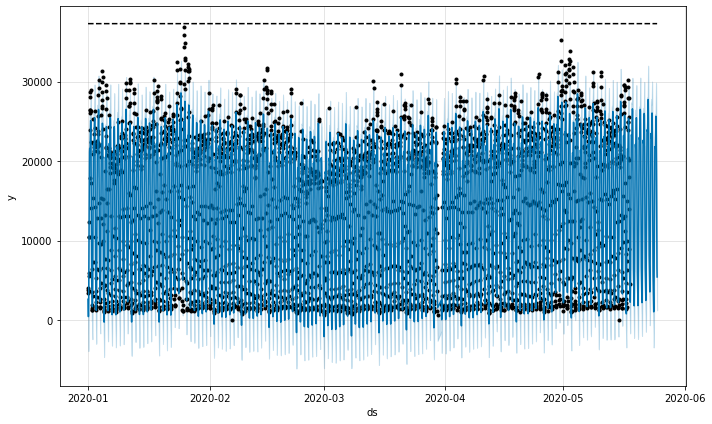

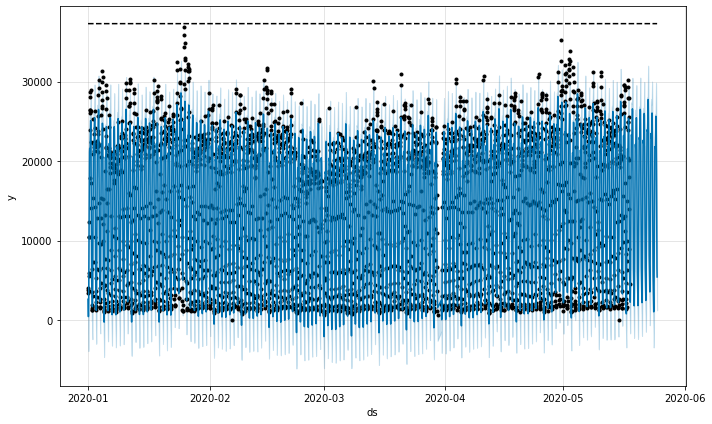

In [353]:
m.plot(forecast)

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


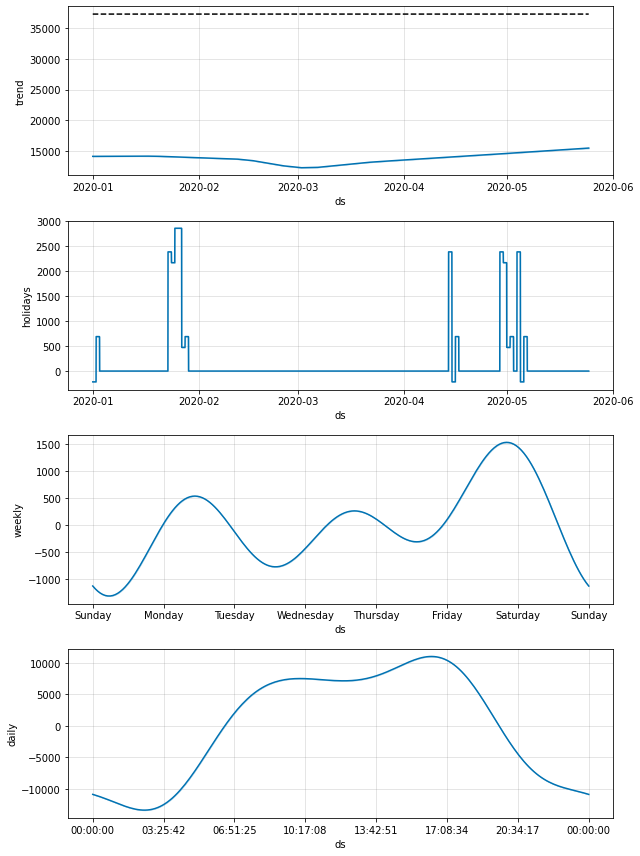

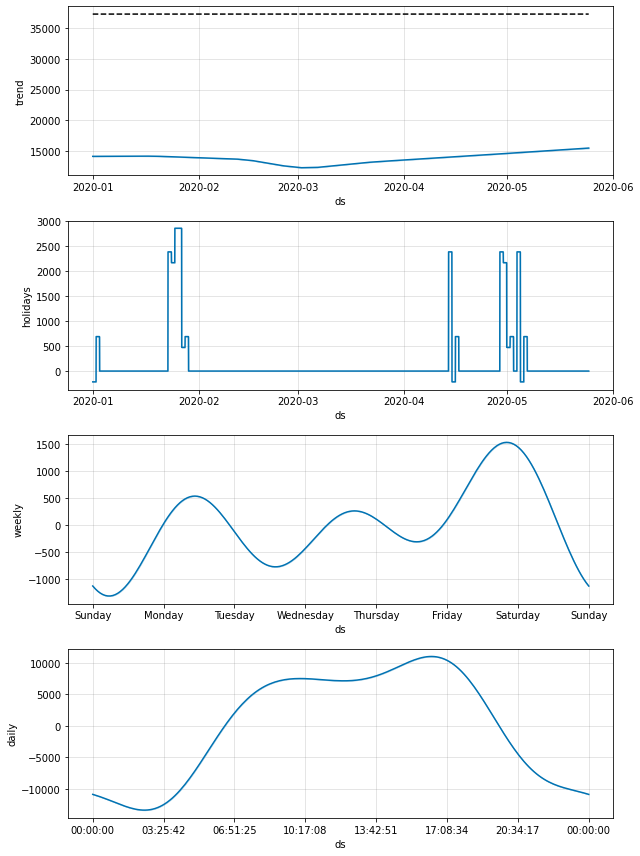

In [354]:
m.plot_components(forecast)

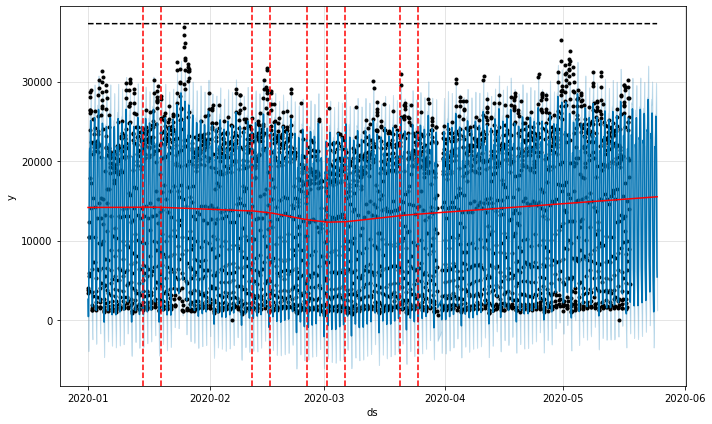

In [355]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [356]:
train.columns

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000', 'ds'],
      dtype='object')

In [357]:
pred.columns = train.columns
pred.columns

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000', 'ds'],
      dtype='object')

In [358]:
# rmse 구하기

pred_ = pred.iloc[-336:, :-1].reset_index(drop=True)
valid_ = valid.iloc[:, 2:].astype(float)

display(pred_, valid_)

10           100          101           120          121  \
0    102115.390001  22705.674832  2154.776338   7118.466757  2015.628237   
1     69236.340331  16031.729289  1579.979040   5707.561265  1467.382383   
2     49659.253021  11943.668639  1186.523692   5019.659353   780.873930   
3     54263.974553  13854.723503  1242.234912   5332.713163   490.563499   
4     87820.452036  23639.306995  1916.044639   6703.362570  1180.936141   
..             ...           ...          ...           ...          ...   
331  297945.456506  88209.862539  9431.507242  25693.893371  9246.330179   
332  256011.280700  68563.605888  6907.835240  20018.581632  6608.892962   
333  215171.799342  51979.604063  5040.053077  15785.151930  4438.458690   
334  177624.050988  40387.147650  3913.052570  12958.106781  3152.393952   
335  141409.399064  32325.435281  3229.197316  10899.626598  2601.023462   

             140            150          160           200          201  ...  \
0    1895.463184   42453.764223  1581.958830   5506.286232  2218.019340  ...   
1    1576.464002   29060.772566  1142.489041   4397.154485  1747.134597  ...   
2    1268.848864   22765.042737   819.728061   3670.053816  1702.818022  ...   
3    1176.932472   26485.444504   823.775175   3661.722256  2032.487065  ...   
4    1502.236803   40237.896786  1324.986236   4477.317730  2550.556890  ...   
..           ...            ...          ...           ...          ...  ...   
331  7245.890832  132021.197830  6046.501882  18857.034889  8170.712944  ...   
332  5408.461551  112155.549847  4742.212335  14673.410301  6546.413044  ...   
333  3933.393948   94209.338596  3633.658605  11359.039604  5247.305123  ...   
334  3033.521927   77656.989909  2844.840640   9172.250529  4223.523501  ...   
335  2580.748680   61094.425414  2300.291378   7718.660199  3331.945894  ...   

            1020          1040          1100          1200         1510  \
0    1448.209153   4064.155412   8520.203288   4934.860937  2605.223364   
1    1035.046260   2823.794548   4974.484039   2687.703656  2084.020982   
2     561.071578   1912.722424   2260.181280   1013.063651  1909.544441   
3     418.388764   2109.073917   3103.817495   1213.921341  2021.012740   
4    1022.025267   4071.128692   9318.938025   4164.827126  2259.642146   
..           ...           ...           ...           ...          ...   
331  7052.809630  14595.257938  29202.126598  17112.741863  7783.934084   
332  4997.428401  12119.673923  22241.249557  14614.257967  6487.907454   
333  3377.023311   9509.304668  15108.022691  11707.754963  5466.988658   
334  2449.862126   7345.897987   9763.602069   9116.208018  4610.528689   
335  2048.219261   5768.144842   6236.601781   6953.053040  3789.618504   

             2510         3000          4510          5510          6000  
0     6557.575781   837.390475   3085.461849   2717.651996   4140.836409  
1     5300.884461   719.871865   2352.005009   2058.953948   3048.255465  
2     4438.043155   441.255757   1186.191266   1347.032423   2002.596040  
3     4425.875922   254.353693    830.794676   1291.176334   2120.744447  
4     5701.292279   494.890201   2733.094167   2520.780142   4318.421148  
..            ...          ...           ...           ...           ...  
331  21830.560142  3537.220680  16038.542762  10547.000869  18573.160426  
332  17389.753750  2472.549907  11662.775174   7741.501778  13386.652914  
333  13623.153401  1509.779890   7522.795824   5399.923826   9099.336123  
334  10917.138951   945.397257   4913.299874   4034.253420   6565.996846  
335   9049.619814   791.942833   3961.105905   3458.934736   5430.111209  

[336 rows x 35 columns]

10      100      101      120     121     140       150     160  \
0     77968.0  14429.0   1233.0   4021.0   981.0   881.0   28672.0  1064.0   
1     48679.0   9136.0    823.0   2618.0   654.0   572.0   17722.0   672.0   
2     33773.0   8199.0    578.0   2188.0   392.0   502.0   14464.0   579.0   
3     41511.0   9986.0    726.0   2817.0   555.0   646.0   17793.0   650.0   
4     78680.0  19509.0   1463.0   4720.0   825.0  1088.0   35125.0   997.0   
..        ...      ...      ...      ...     ...     ...       ...     ...   
331  314226.0  98345.0  10625.0  28618.0  8316.0  6684.0  141675.0  6619.0   
332  300001.0  87871.0   8226.0  22706.0  6981.0  5743.0  142933.0  6295.0   
333  304150.0  71126.0   6002.0  18317.0  4939.0  3779.0  133110.0  4781.0   
334  236751.0  44947.0   3575.0  11455.0  3135.0  2536.0   98582.0  3267.0   
335  143609.0  26137.0   2242.0   6166.0  1609.0  1391.0   54633.0  1899.0   

         200     201  ...    1020     1040     1100     1200    1510     2510  \
0     2859.0  1549.0  ...   637.0   2604.0   5239.0   4168.0  1155.0   3596.0   
1     1940.0  1133.0  ...   353.0   1870.0   3359.0   2558.0  1002.0   2157.0   
2     1425.0  1211.0  ...   345.0   1499.0   2646.0   2022.0   876.0   1959.0   
3     1678.0  1748.0  ...   390.0   1730.0   3398.0   1967.0   912.0   2462.0   
4     2531.0  2304.0  ...   679.0   2958.0   7369.0   4120.0  1569.0   4568.0   
..       ...     ...  ...     ...      ...      ...      ...     ...      ...   
331  23535.0  8572.0  ...  8254.0  16118.0  23304.0  14082.0  8447.0  21694.0   
332  20953.0  7851.0  ...  5225.0  15297.0  21919.0  14526.0  7332.0  19732.0   
333  15242.0  6101.0  ...  4072.0  12685.0  21135.0  14403.0  5443.0  16967.0   
334   8849.0  4553.0  ...  2489.0   8093.0  14427.0  10914.0  3861.0  11397.0   
335   5182.0  2422.0  ...  1343.0   4686.0   8732.0   6986.0  2161.0   6487.0   

       3000     4510     5510     6000  
0     337.0   2262.0   1608.0   2337.0  
1     257.0   1425.0   1018.0   1810.0  
2     232.0   1155.0    927.0   1530.0  
3     281.0   1477.0    959.0   1882.0  
4     577.0   3155.0   1871.0   3656.0  
..      ...      ...      ...      ...  
331  2180.0  15746.0  10903.0  21014.0  
332  1990.0  14096.0  10028.0  17787.0  
333  1359.0  11670.0   7963.0  14041.0  
334   859.0   7270.0   5194.0   8230.0  
335   410.0   3963.0   2686.0   4690.0  

[336 rows x 35 columns]

In [359]:
error = pred_ - valid_
error

10           100          101          120          121  \
0    24147.390001   8276.674832   921.776338  3097.466757  1034.628237   
1    20557.340331   6895.729289   756.979040  3089.561265   813.382383   
2    15886.253021   3744.668639   608.523692  2831.659353   388.873930   
3    12752.974553   3868.723503   516.234912  2515.713163   -64.436501   
4     9140.452036   4130.306995   453.044639  1983.362570   355.936141   
..            ...           ...          ...          ...          ...   
331 -16280.543494 -10135.137461 -1193.492758 -2924.106629   930.330179   
332 -43989.719300 -19307.394112 -1318.164760 -2687.418368  -372.107038   
333 -88978.200658 -19146.395937  -961.946923 -2531.848070  -500.541310   
334 -59126.949012  -4559.852350   338.052570  1503.106781    17.393952   
335  -2199.600936   6188.435281   987.197316  4733.626598   992.023462   

             140           150          160          200          201  ...  \
0    1014.463184  13781.764223   517.958830  2647.286232   669.019340  ...   
1    1004.464002  11338.772566   470.489041  2457.154485   614.134597  ...   
2     766.848864   8301.042737   240.728061  2245.053816   491.818022  ...   
3     530.932472   8692.444504   173.775175  1983.722256   284.487065  ...   
4     414.236803   5112.896786   327.986236  1946.317730   246.556890  ...   
..           ...           ...          ...          ...          ...  ...   
331   561.890832  -9653.802170  -572.498118 -4677.965111  -401.287056  ...   
332  -334.538449 -30777.450153 -1552.787665 -6279.589699 -1304.586956  ...   
333   154.393948 -38900.661404 -1147.341395 -3882.960396  -853.694877  ...   
334   497.521927 -20925.010091  -422.159360   323.250529  -329.476499  ...   
335  1189.748680   6461.425414   401.291378  2536.660199   909.945894  ...   

            1020         1040         1100         1200         1510  \
0     811.209153  1460.155412  3281.203288   766.860937  1450.223364   
1     682.046260   953.794548  1615.484039   129.703656  1082.020982   
2     216.071578   413.722424  -385.818720 -1008.936349  1033.544441   
3      28.388764   379.073917  -294.182505  -753.078659  1109.012740   
4     343.025267  1113.128692  1949.938025    44.827126   690.642146   
..           ...          ...          ...          ...          ...   
331 -1201.190370 -1522.742062  5898.126598  3030.741863  -663.065916   
332  -227.571599 -3177.326077   322.249557    88.257967  -844.092546   
333  -694.976689 -3175.695332 -6026.977309 -2695.245037    23.988658   
334   -39.137874  -747.102013 -4663.397931 -1797.791982   749.528689   
335   705.219261  1082.144842 -2495.398219   -32.946960  1628.618504   

            2510         3000         4510         5510         6000  
0    2961.575781   500.390475   823.461849  1109.651996  1803.836409  
1    3143.884461   462.871865   927.005009  1040.953948  1238.255465  
2    2479.043155   209.255757    31.191266   420.032423   472.596040  
3    1963.875922   -26.646307  -646.205324   332.176334   238.744447  
4    1133.292279   -82.109799  -421.905833   649.780142   662.421148  
..           ...          ...          ...          ...          ...  
331   136.560142  1357.220680   292.542762  -355.999131 -2440.839574  
332 -2342.246250   482.549907 -2433.224826 -2286.498222 -4400.347086  
333 -3343.846599   150.779890 -4147.204176 -2563.076174 -4941.663877  
334  -479.861049    86.397257 -2356.700126 -1159.746580 -1664.003154  
335  2562.619814   381.942833    -1.894095   772.934736   740.111209  

[336 rows x 35 columns]

In [360]:
squared_error = error**2

In [361]:
squared_error_list = []

for col in squared_error.columns:
  squared_error_list += squared_error[col].values.tolist()

len(squared_error_list)

11760

In [362]:
rmse = np.sqrt(np.mean(squared_error_list))
rmse

8845.833752610602

## train+valid -> test -> submission

In [380]:
train = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
train

날짜  시간      10     100    101    120    121   140     150   160  \
0     20200101   0   83247   19128   2611   5161   1588   892   32263  1636   
1     20200101   1   89309   19027   3337   5502   1650  1043   35609  1644   
2     20200101   2   66611   14710   2970   4631   1044   921   26821  1104   
3     20200101   3   53290   13753   2270   4242   1021   790   21322   909   
4     20200101   4   52095   17615   2406   3689   1840   922   22711  1354   
...        ...  ..     ...     ...    ...    ...    ...   ...     ...   ...   
3274  20200517  19  311727  101285  10085  30637  10060  8749  148935  6801   
3275  20200517  20  305354   91426   8607  26021   8095  7198  136503  6147   
3276  20200517  21  306008   75113   6325  19933   5711  4494  129412  5134   
3277  20200517  22  237447   49498   4209  12145   3891  2718   96698  3526   
3278  20200517  23  150312   27410   2350   6406   1803  1614   55788  1849   

      ...  1020   1040   1100   1200  1510   2510  3000   4510   5510   6000  
0     ...  1311   3482  11299   7072  1176   3810   748   3920   2133   3799  
1     ...  1162   3849  13180   8771  1283   3763   782   3483   2057   4010  
2     ...   768   2299   7986   5426  1536   3229   491   2634   1526   3388  
3     ...   632   1716   5703   3156  1104   2882   431   2488   1268   3686  
4     ...   875   2421   5816   2933  1206   2433   499   2952   1927   5608  
...   ...   ...    ...    ...    ...   ...    ...   ...    ...    ...    ...  
3274  ...  6726  15431  25597  14292  9300  22238  3786  16936  10729  20194  
3275  ...  5501  15378  24661  14747  8239  20604  3203  15018   9767  17962  
3276  ...  4216  12558  22781  14081  6392  17937  2447  12403   7825  14031  
3277  ...  2578   8870  16640  11066  4427  11955  1495   7507   5387   8889  
3278  ...  1377   5021  10058   7139  2250   6844   735   4116   3046   4606  

[3279 rows x 37 columns]

In [392]:
valid = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
valid = valid.iloc[168:,:]

In [393]:
valid

날짜  시간      10    100    101    120   121   140     150   160  ...  \
168  20200518   0   82065  15172   1500   3294  1086   962   28931  1103  ...   
169  20200518   1   51248   9840    813   2356   696   546   17888   720  ...   
170  20200518   2   39026   7894    760   2413   408   549   13357   498  ...   
171  20200518   3   40993  10137    780   2701   420   741   15544   532  ...   
172  20200518   4   77863  19603   1276   5019   968  1160   32101   968  ...   
..        ...  ..     ...    ...    ...    ...   ...   ...     ...   ...  ...   
331  20200524  19  314226  98345  10625  28618  8316  6684  141675  6619  ...   
332  20200524  20  300001  87871   8226  22706  6981  5743  142933  6295  ...   
333  20200524  21  304150  71126   6002  18317  4939  3779  133110  4781  ...   
334  20200524  22  236751  44947   3575  11455  3135  2536   98582  3267  ...   
335  20200524  23  143609  26137   2242   6166  1609  1391   54633  1899  ...   

     1020   1040   1100   1200  1510   2510  3000   4510   5510   6000  
168   618   2790   5147   4331  1329   3665   404   2242   1619   2314  
169   430   1864   3269   2561   921   2081   272   1390   1003   1766  
170   322   1313   2765   1931   920   1764   228   1136    922   1309  
171   326   1766   3320   2060   892   2447   337   1495    975   1912  
172   669   2914   6986   3911  1368   4380   513   2940   1758   3629  
..    ...    ...    ...    ...   ...    ...   ...    ...    ...    ...  
331  8254  16118  23304  14082  8447  21694  2180  15746  10903  21014  
332  5225  15297  21919  14526  7332  19732  1990  14096  10028  17787  
333  4072  12685  21135  14403  5443  16967  1359  11670   7963  14041  
334  2489   8093  14427  10914  3861  11397   859   7270   5194   8230  
335  1343   4686   8732   6986  2161   6487   410   3963   2686   4690  

[168 rows x 37 columns]

In [394]:
train_valid = pd.concat([train, valid])

In [395]:
train_valid['날짜'] = train_valid['날짜'].astype(str)
train_valid['ds'] = pd.to_datetime(train_valid['날짜']) + pd.to_timedelta(train_valid['시간'], unit='h')
train_valid

날짜  시간      10    100    101    120   121   140     150   160  ...  \
0    20200101   0   83247  19128   2611   5161  1588   892   32263  1636  ...   
1    20200101   1   89309  19027   3337   5502  1650  1043   35609  1644  ...   
2    20200101   2   66611  14710   2970   4631  1044   921   26821  1104  ...   
3    20200101   3   53290  13753   2270   4242  1021   790   21322   909  ...   
4    20200101   4   52095  17615   2406   3689  1840   922   22711  1354  ...   
..        ...  ..     ...    ...    ...    ...   ...   ...     ...   ...  ...   
331  20200524  19  314226  98345  10625  28618  8316  6684  141675  6619  ...   
332  20200524  20  300001  87871   8226  22706  6981  5743  142933  6295  ...   
333  20200524  21  304150  71126   6002  18317  4939  3779  133110  4781  ...   
334  20200524  22  236751  44947   3575  11455  3135  2536   98582  3267  ...   
335  20200524  23  143609  26137   2242   6166  1609  1391   54633  1899  ...   

      1040   1100   1200  1510   2510  3000   4510   5510   6000  \
0     3482  11299   7072  1176   3810   748   3920   2133   3799   
1     3849  13180   8771  1283   3763   782   3483   2057   4010   
2     2299   7986   5426  1536   3229   491   2634   1526   3388   
3     1716   5703   3156  1104   2882   431   2488   1268   3686   
4     2421   5816   2933  1206   2433   499   2952   1927   5608   
..     ...    ...    ...   ...    ...   ...    ...    ...    ...   
331  16118  23304  14082  8447  21694  2180  15746  10903  21014   
332  15297  21919  14526  7332  19732  1990  14096  10028  17787   
333  12685  21135  14403  5443  16967  1359  11670   7963  14041   
334   8093  14427  10914  3861  11397   859   7270   5194   8230   
335   4686   8732   6986  2161   6487   410   3963   2686   4690   

                     ds  
0   2020-01-01 00:00:00  
1   2020-01-01 01:00:00  
2   2020-01-01 02:00:00  
3   2020-01-01 03:00:00  
4   2020-01-01 04:00:00  
..                  ...  
331 2020-05-24 19:00:00  
332 2020-05-24 20:00:00  
333 2020-05-24 21:00:00  
334 2020-05-24 22:00:00  
335 2020-05-24 23:00:00  

[3447 rows x 38 columns]

In [396]:
train_valid = train_valid.drop(columns=['날짜', '시간'])

In [403]:
df = pd.DataFrame()
df['ds'] = train_valid['ds']

pred = pd.DataFrame()

for i in range(35):
    df['y'] = train_valid.iloc[:, i]
    df['cap'] = int(train_valid.iloc[:,i].max(axis=0)) + int(train_valid.iloc[:,i].max(axis=0)) * 0.15
    df['floor'] = int(train_valid.iloc[:,i].max(axis=0)) * 0.08
    m = Prophet(holidays=holidays, growth='logistic', changepoint_prior_scale= 0.3, changepoint_range= 0.85)  # changepoint_prior_scale=0.1
    # m.add_seasonality(name='monthly', period=30, fourier_order=5)
    m.fit(df)

    future = m.make_future_dataframe(freq='H', periods=168)
    future['cap'] = int(train_valid.iloc[:,i].max(axis=0)) + int(train_valid.iloc[:,i].max(axis=0)) * 0.15
    future['floor'] = int(train_valid.iloc[:,i].max(axis=0)) * 0.08
    forecast = m.predict(future)
    result = forecast[['ds', 'yhat','cap','floor']]
  
    pred[str(i)] = result['yhat']

pred['ds'] = future['ds']
pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -185.184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7337.94     0.0224078       536.986      0.4244           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7352.11     0.0275763        100.47           1           1      217   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7359.21    0.00740153       35.2887           1           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7361.4    0.00216622       57.2571      0.9791      0.9791      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7362.52   0.000252149       19.5441           1           1      544   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -192.564
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7305.94      0.010287       122.924      0.6653      0.6653      108   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7308.95    0.00717281       46.2975      0.3847           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7310.45    0.00464929       41.6307      0.4916      0.4916      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7312.28   0.000633826       29.3584           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       7312.53   0.000172781       21.9086   9.417e-06       0.001      525  LS failed, Hessian reset 
     499       7312.77    0.00451026    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -218.745
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8138.62    0.00202052       2395.18           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8147.46   0.000416505       225.465           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8150.62    0.00015042       185.159           1           1      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8151.12    0.00101101       46.1856           1           1      513   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8151.55    0.00066048       433.729      0.3607      0.3607      635   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -215.06
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8061.89     0.0295083       6047.77      0.2559           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8154.42   0.000261922       170.982       1.784      0.1784      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8155.77   0.000941812       580.161      0.1013           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8159.83   0.000541023       198.294      0.5331     0.05331      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8163.57    0.00226233       60.7899           1           1      634   
    Iter      log prob        ||dx||      ||grad||       alpha   

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -323.629
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6815.85    0.00109016       213.802           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6823.03   0.000313278       958.314      0.4513      0.4513      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6829.04     0.0208979       148.629           1           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6830.92    0.00637558       1099.55           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6832.83    0.00037658       149.647      0.7711      0.7711      705   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -242.523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7447.41    0.00038859       298.915           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7458.49   4.56764e-05       470.636      0.5771      0.5771      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7460.79    0.00203918       275.662      0.0104           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7462.51    0.00113526       400.997       1.469     0.01469      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        7463.5   0.000120632       55.3682           1           1      667   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -164.132
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7466.33   0.000612989        58.404      0.6114      0.6114      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7474.15     0.0222418       93.5033           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7477.15    0.00293017       30.2632           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7477.66     0.0203706       31.3018           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       7477.66   0.000129666       21.7902   4.142e-06       0.001      492  LS failed, Hessian reset 
     485       7478.71   0.000233913    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -157.244
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7279.57    0.00276186       116.539      0.3273      0.3273      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7289.25    0.00232226        63.717      0.4721      0.4721      218   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7293.16   0.000546879       51.2329           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381       7295.47   8.08609e-05       32.9619   1.071e-06       0.001      467  LS failed, Hessian reset 
     399       7295.94   0.000224653       44.9032      0.5912      0.5912      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        7296.8   0.000216387    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.2761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6931.39     0.0176867       38.8859           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       6936.54   0.000203022       23.9468   1.169e-05       0.001      234  LS failed, Hessian reset 
     199       6936.93     0.0307867       113.665           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6938.52   0.000903997       22.2498           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6939.32    0.00138233         18.83           1           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6940.35   0.000236708    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -231.982
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8112.09    0.00244707       2893.82           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8149.83    0.00091441       851.485      0.2862           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8152.66    0.00493599       1130.37           1           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8154.82    0.00526556       710.515           1           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8156.68   0.000133643        732.22           1           1      639   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -139.729
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7630.34    0.00111583       37.5898           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7638.62    0.00835646       59.5788           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       7640.89   0.000144576       22.4984   3.688e-06       0.001      366  LS failed, Hessian reset 
     299       7640.92    0.00158685       54.3631           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       7641.53   0.000212805       37.2015   3.866e-06       0.001      479  LS failed, Hessian reset 
     399       7642.11    0.00154978       35.3072           1           1      525   
    Iter      log pro

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -260.962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7373.88   0.000896489       815.045           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7412.04    0.00381476       446.705           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7419.95    0.00425066       4327.05    0.003929           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7436.98     0.0121121       90.4338       0.705       0.705      598   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7440.02    0.00482301       209.899      0.4342    0.004342      766   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -151.591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7455.31    0.00984988       13313.6      0.2111      0.2111      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        7530.4   0.000784828       572.582      0.9737      0.9737      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7536.66   0.000956532       624.483     0.09992           1      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7547.15    0.00232366       584.498       2.307      0.2307      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7549.52     0.0060956       305.251      0.9022      0.9022      643   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -100.082
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7105.29    0.00810705       131.251           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7112.81     0.0114397       115.892           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7116.1    0.00108035       36.7929           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       7117.32   0.000314294       14.7789   3.457e-06       0.001      439  LS failed, Hessian reset 
     399       7117.66   5.76663e-05        14.363      0.2499      0.2499      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7118.25   0.000571156    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -247.631
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7424.48   0.000193774       4241.67      0.2683      0.2683      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7489.23    0.00222338       1636.84           1           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7490.84   0.000799951       208.925           1           1      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7492.48    0.00915837       471.617      0.9486      0.9486      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7494.13   0.000958236       189.419      0.9737      0.9737      659   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -201.968
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6842.07    0.00800022       75.9469           1           1      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6853.28    0.00102112       68.6156      0.2129      0.2129      217   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6856.27    0.00944955       49.0535      0.8708      0.8708      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6858.44    0.00106508       22.8533           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6862.39     0.0128899       80.4114           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -257.649
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6432.51    0.00519012       102.525           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6437.35    0.00324713       37.4939           1           1      216   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6439.13     0.0062428       50.5438           1           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6440.5    0.00516098       37.5107      0.9738      0.9738      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6441.06   0.000514105       16.1342      0.5901      0.5901      562   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -158.522
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        7102.4    0.00472092       53.0398           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7106.93    0.00490378       51.7888      0.9573      0.9573      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7108.02    0.00687921       44.4607           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7109.01    0.00389355       89.8122           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     461        7109.4    0.00077657        94.533   1.092e-05       0.001      574  LS failed, Hessian reset 
     499       7109.73    0.00112525    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -113.013
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7731.51    0.00223336       174.639           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7749.37    0.00870671       232.352           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7756.2    0.00996846        110.97      0.9365      0.9365      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       7758.34   6.33687e-09       33.9124   2.968e-07           1      442   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -142.799
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7345.36     0.0118368        143.46      0.2114           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7355.08    0.00134396       49.3037           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7356.76   0.000822542       50.0663      0.5322      0.5322      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7357.11   0.000886216       19.7058           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7357.84   0.000372587       11.4594           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -256.769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7212.58    0.00395599       3327.67           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7283.45    0.00304486       2188.06           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7309.4       0.00147       203.942           1           1      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7310.59    0.00111577       345.574      0.5268      0.5268      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        7321.4    0.00536029       2285.66      0.6882      0.6882      660   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -90.8819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6666.94      0.127366       162.291           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6670.44    0.00698433       81.5367           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6672.35   0.000655022        19.906      0.8286      0.8286      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6672.7     0.0033188       16.9279           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431        6673.4   0.000357023       23.7172   5.047e-06       0.001      553  LS failed, Hessian reset 
     499       6674.11   0.000827134    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -69.1916
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7470.05   0.000819295       25.5537           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       7472.11   0.000325749       52.4678   6.493e-06       0.001      229  LS failed, Hessian reset 
     199       7472.62     0.0128488        109.98      0.5669           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7473.74    0.00058465       15.5884           1           1      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7474.1    0.00133928       55.1474      0.2408      0.4935      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     419       7474.56   0.000140725    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -228.413
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7847.57    0.00914824       3662.02      0.1813           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        7908.9     0.0141856       1251.05           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7911.72     0.0105797       525.333           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7914.94   0.000189385       255.501           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        7917.9    0.00129306       284.367      0.1389           1      714   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -308.702
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6275.75    0.00312623       45.5365      0.9708      0.9708      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       6275.86   0.000207948       17.8894   6.744e-06       0.001      178  LS failed, Hessian reset 
     176       6276.05   0.000331818       23.1629   7.361e-06       0.001      276  LS failed, Hessian reset 
     199       6276.12   0.000574506       10.9149      0.7265      0.7265      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       6276.18    0.00013927        9.7426   1.339e-05       0.001      417  LS failed, Hessian reset 
     276       6276.18   8.82851e-07       7.17184     0.07822           1      441   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -293.801
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6543.45   0.000460465       428.612           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6586.55   3.10058e-05       216.326      0.2302      0.2302      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6587.58   0.000295052       426.875           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6590.5   0.000518687       95.4459           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6591.06    0.00115701       148.959           1           1      675   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -264.914
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6829.6    0.00111843       26.7787           1           1      107   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       6829.78   0.000160315       25.3762   3.178e-06       0.001      160  LS failed, Hessian reset 
     199       6830.77    0.00612428       24.9503      0.8174      0.8174      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       6831.59   0.000140343       22.5195   6.153e-06       0.001      368  LS failed, Hessian reset 
     299       6831.73    0.00106796       24.9029           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       6831.76   0.000316922       13.2217   1.831e-05       0.001      529  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -188.621
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6598.41    0.00870016       109.855           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6664.86     0.0311301       121.116       0.843       0.843      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6676.11     0.0197506        88.872           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6680.62      0.022858       86.9586      0.5989           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6682.54    0.00203376         52.39      0.3179           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -304.572
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6588.47   0.000359845       469.888           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6590.03   9.06162e-05       198.702      0.2768           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6590.4   0.000711605       181.432       0.315           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6592.02    0.00382061       39.6987           1           1      608   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6592.17    0.00100461        141.67           1           1      747   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -234.953
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7048.96   0.000412145       67.6511      0.1548           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        7054.4    0.00280411       237.689      0.4928      0.4928      264   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7055.36   0.000148703       24.5342           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7056.1   0.000225814       62.5654           1           1      539   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     498       7056.35    8.0392e-06       92.3572   3.689e-08       0.001      746  LS failed, Hessian reset 
     499       7056.37   0.000313603    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -185.545
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6662.49    0.00465673       109.055           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       6667.79   0.000235441       23.0662   1.646e-05       0.001      240  LS failed, Hessian reset 
     199       6668.29     0.0209282       33.4449           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       6669.61   0.000179254       18.3428   1.233e-05       0.001      403  LS failed, Hessian reset 
     299       6669.62   0.000677712        22.665           1           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       6669.74   0.000191538       18.9093   8.921e-06       0.001      483  LS failed, Hessian rese

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -283.748
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5947.87     0.0225339         10937      0.1408           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6033.17    0.00144821        3570.9     0.01225           1      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6106.54    0.00130504       1203.68      0.3686    0.003686      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6118.2    0.00543299       496.631           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6170.34    0.00439179       1007.01           1           1      669   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -301.984
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6482.28    0.00721952       9780.37           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6564.44    0.00185542       1118.67       0.454      0.0454      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6581.08     0.0159622       1887.74           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6587.08    0.00216022       308.667           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        6596.7    0.00484844       617.757    0.006643           1      709   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -269.024
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6313.26    0.00764486       40.4649           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6316.86    0.00100894       54.4653      0.8783      0.8783      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       6318.04   0.000591577       61.5021   8.515e-06       0.001      343  LS failed, Hessian reset 
     299        6318.4     0.0112113        55.912           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6319.29    0.00125287       19.4109      0.6866      0.6866      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        6320.6    0.00206578    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -275.829
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6411.87     0.0230823       60.0876      0.7958      0.7958      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       6414.22   0.000204674       38.8816   3.984e-06       0.001      220  LS failed, Hessian reset 
     199       6414.96    0.00103848       23.2596           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6415.89     0.0031686       30.0504           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6416.62     0.0583132       44.8559           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       6416.62   0.000218043    

/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/conda/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


0             1            2             3            4  \
0      62653.681101  15601.021259  3007.102124   7770.012542  2191.981506   
1      29045.645110   8851.500765  2473.728698   6509.596772  1663.665286   
2       9101.561527   4744.593108  2122.954103   5990.453628   997.818680   
3      13846.330385   6732.918484  2224.161056   6492.616776   732.235181   
4      47955.601138  16699.934895  2952.051606   8075.624698  1456.413248   
...             ...           ...          ...           ...          ...   
3610  300081.115649  89953.934770  9384.780986  26089.750939  9097.671385   
3611  258084.773576  70172.295562  6851.983839  20390.436189  6453.268410   
3612  217262.484944  53495.387096  4972.710213  16126.913543  4273.197831   
3613  179735.138332  41848.224946  3833.657115  13264.924629  2976.809148   
3614  143402.929069  33737.187499  3140.309262  11171.214480  2416.651754   

                5              6            7             8            9  ...  \
0     1563.376244   26095.676438  1612.534500   7546.396824  2421.876748  ...   
1     1270.182948   13241.411410  1178.529737   6635.822685  1957.162743  ...   
2      988.570088    7597.850065   863.941152   6117.562594  1924.384011  ...   
3      924.741911   12107.369448   880.764321   6327.820323  2272.524485  ...   
4     1285.458093   26777.959731  1399.831517   7371.648115  2818.294769  ...   
...           ...            ...          ...           ...          ...  ...   
3610  7020.203125  127685.757166  6021.788168  19081.010530  8133.227642  ...   
3611  5174.634888  107829.258757  4710.542111  14891.703325  6509.588828  ...   
3612  3689.658264   89823.192720  3597.318257  11556.116044  5205.002981  ...   
3613  2780.489108   73150.929665  2805.808704   9338.002311  4172.898509  ...   
3614  2321.582151   56437.017654  2258.723462   7852.036544  3273.987143  ...   

                26            27            28           29            30  \
0      1964.767133   4565.589461   3475.978632  2611.646231   3640.054994   
1       652.363850    722.764682   1048.167092  2183.161156   2383.072145   
2      -320.103614  -2265.073460   -799.448555  2102.580686   1542.874247   
3      -165.327793  -1664.204330   -747.576812  2307.501918   1580.193154   
4      1775.743610   4328.131718   2082.304879  2641.069433   2928.566157   
...            ...           ...           ...          ...           ...   
3610  14804.683898  24862.876469  17391.412102  7709.658694  21143.604219   
3611  12309.387268  17934.588071  14894.408039  6406.383861  16676.162916   
3612   9687.115696  10829.062755  11988.969733  5374.257608  12886.664362   
3613   7518.546999   5502.032536   9400.120403  4505.655497  10160.912353   
3614   5934.648752   1976.037784   7236.711230  3675.732958   8273.015780   

               31            32            33            34  \
0     1241.265118   2477.548038    469.434718   2515.099995   
1     1112.422234   1630.465806   -255.123869   1383.980760   
2      823.014835    364.210077  -1025.712723    313.738194   
3      628.121818    -67.483079  -1124.617780    427.440231   
4      864.146558   1785.979334     80.180746   2640.383508   
...           ...           ...           ...           ...   
3610  3042.737891  16998.134655  10762.168838  18816.380306   
3611  1981.501224  12607.249698   7932.123216  13602.939402   
3612  1021.698500   8453.859538   5573.191604   9294.288448   
3613   460.437543   5835.694587   4198.405143   6746.191344   
3614   309.834463   4875.956004   3616.409764   5597.067435   

                      ds  
0    2020-01-01 00:00:00  
1    2020-01-01 01:00:00  
2    2020-01-01 02:00:00  
3    2020-01-01 03:00:00  
4    2020-01-01 04:00:00  
...                  ...  
3610 2020-05-31 19:00:00  
3611 2020-05-31 20:00:00  
3612 2020-05-31 21:00:00  
3613 2020-05-31 22:00:00  
3614 2020-05-31 23:00:00  

[3615 rows x 36 columns]

In [404]:
pred.columns = train_valid.columns

In [405]:
pred[-168:].reset_index(drop=True)

10           100          101           120          121  \
0    105131.035286  25271.810577  2361.761932   8382.946847  2015.685561   
1     71895.829198  18515.436413  1783.027917   6952.981617  1461.093530   
2     52153.556933  14371.324282  1385.105219   6259.059991   768.676658   
3     56932.128511  16292.944323  1437.663514   6582.349569   476.317283   
4     90912.008925  26164.948026  2115.708861   7983.551494  1173.613583   
..             ...           ...          ...           ...          ...   
163  300081.115649  89953.934770  9384.780986  26089.750939  9097.671385   
164  258084.773576  70172.295562  6851.983839  20390.436189  6453.268410   
165  217262.484944  53495.387096  4972.710213  16126.913543  4273.197831   
166  179735.138332  41848.224946  3833.657115  13264.924629  2976.809148   
167  143402.929069  33737.187499  3140.309262  11171.214480  2416.651754   

             140            150          160           200          201  ...  \
0    1921.202076   40730.403376  1710.519242   6159.488729  2375.947324  ...   
1    1599.959721   27213.671938  1266.050067   5032.378401  1902.036654  ...   
2    1288.723983   20855.650614   939.035599   4295.990973  1856.087518  ...   
3    1193.874874   24602.561906   941.593199   4287.824806  2187.251656  ...   
4    1522.363729   38466.723430  1444.696105   5114.209723  2712.445055  ...   
..           ...            ...          ...           ...          ...  ...   
163  7020.203125  127685.757166  6021.788168  19081.010530  8133.227642  ...   
164  5174.634888  107829.258757  4710.542111  14891.703325  6509.588828  ...   
165  3689.658264   89823.192720  3597.318257  11556.116044  5205.002981  ...   
166  2780.489108   73150.929665  2805.808704   9338.002311  4172.898509  ...   
167  2321.582151   56437.017654  2258.723462   7852.036544  3273.987143  ...   

             1040          1100          1200         1510          2510  \
0     4429.593699   1833.607777   5085.799814  2756.212179   6607.503535   
1     3171.859507  -1730.166543   2821.028740  2233.927734   5333.202898   
2     2248.901209  -4449.659045   1133.725113  2058.128039   4464.653584   
3     2447.815436  -3592.892626   1342.264202  2166.902902   4462.860330   
4     4427.512274   2641.366477   4324.334345  2403.883122   5761.746496   
..            ...           ...           ...          ...           ...   
163  14804.683898  24862.876469  17391.412102  7709.658694  21143.604219   
164  12309.387268  17934.588071  14894.408039  6406.383861  16676.162916   
165   9687.115696  10829.062755  11988.969733  5374.257608  12886.664362   
166   7518.546999   5502.032536   9400.120403  4505.655497  10160.912353   
167   5934.648752   1976.037784   7236.711230  3675.732958   8273.015780   

            3000          4510          5510          6000                  ds  
0     443.282360   4062.724083   3029.245452   4556.563388 2020-05-25 00:00:00  
1     325.545432   3315.853628   2356.626932   3447.534964 2020-05-25 01:00:00  
2      46.549628   2143.469610   1634.204993   2392.140876 2020-05-25 02:00:00  
3    -138.708957   1798.880807   1579.460902   2513.484012 2020-05-25 03:00:00  
4     106.102466   3732.351490   2824.239468   4726.985045 2020-05-25 04:00:00  
..           ...           ...           ...           ...                 ...  
163  3042.737891  16998.134655  10762.168838  18816.380306 2020-05-31 19:00:00  
164  1981.501224  12607.249698   7932.123216  13602.939402 2020-05-31 20:00:00  
165  1021.698500   8453.859538   5573.191604   9294.288448 2020-05-31 21:00:00  
166   460.437543   5835.694587   4198.405143   6746.191344 2020-05-31 22:00:00  
167   309.834463   4875.956004   3616.409764   5597.067435 2020-05-31 23:00:00  

[168 rows x 36 columns]

In [406]:
sub = pd.read_csv(os.path.join(DATASET_PATH, 'sample_submission.csv'))
sub

timestamp   10  100  101  120  121  140  150  160  200  ...  1020  \
0     20200525_0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1     20200525_1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2     20200525_2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3     20200525_3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4     20200525_4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
..           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
163  20200531_19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
164  20200531_20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
165  20200531_21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
166  20200531_22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
167  20200531_23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

     1040  1100  1200  1510  2510  3000  4510  5510  6000  
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
163   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
164   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
165   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
166   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
167   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[168 rows x 36 columns]

In [407]:
sub.iloc[:, 1:] = pred[-168:].reset_index(drop=True)
sub

timestamp             10           100          101           120  \
0     20200525_0  105131.035286  25271.810577  2361.761932   8382.946847   
1     20200525_1   71895.829198  18515.436413  1783.027917   6952.981617   
2     20200525_2   52153.556933  14371.324282  1385.105219   6259.059991   
3     20200525_3   56932.128511  16292.944323  1437.663514   6582.349569   
4     20200525_4   90912.008925  26164.948026  2115.708861   7983.551494   
..           ...            ...           ...          ...           ...   
163  20200531_19  300081.115649  89953.934770  9384.780986  26089.750939   
164  20200531_20  258084.773576  70172.295562  6851.983839  20390.436189   
165  20200531_21  217262.484944  53495.387096  4972.710213  16126.913543   
166  20200531_22  179735.138332  41848.224946  3833.657115  13264.924629   
167  20200531_23  143402.929069  33737.187499  3140.309262  11171.214480   

             121          140            150          160           200  ...  \
0    2015.685561  1921.202076   40730.403376  1710.519242   6159.488729  ...   
1    1461.093530  1599.959721   27213.671938  1266.050067   5032.378401  ...   
2     768.676658  1288.723983   20855.650614   939.035599   4295.990973  ...   
3     476.317283  1193.874874   24602.561906   941.593199   4287.824806  ...   
4    1173.613583  1522.363729   38466.723430  1444.696105   5114.209723  ...   
..           ...          ...            ...          ...           ...  ...   
163  9097.671385  7020.203125  127685.757166  6021.788168  19081.010530  ...   
164  6453.268410  5174.634888  107829.258757  4710.542111  14891.703325  ...   
165  4273.197831  3689.658264   89823.192720  3597.318257  11556.116044  ...   
166  2976.809148  2780.489108   73150.929665  2805.808704   9338.002311  ...   
167  2416.651754  2321.582151   56437.017654  2258.723462   7852.036544  ...   

            1020          1040          1100          1200         1510  \
0    1644.776369   4429.593699   1833.607777   5085.799814  2756.212179   
1    1223.086100   3171.859507  -1730.166543   2821.028740  2233.927734   
2     743.201332   2248.901209  -4449.659045   1133.725113  2058.128039   
3     602.277401   2447.815436  -3592.892626   1342.264202  2166.902902   
4    1213.323463   4427.512274   2641.366477   4324.334345  2403.883122   
..           ...           ...           ...           ...          ...   
163  7105.878185  14804.683898  24862.876469  17391.412102  7709.658694   
164  5028.823171  12309.387268  17934.588071  14894.408039  6406.383861   
165  3396.942765   9687.115696  10829.062755  11988.969733  5374.257608   
166  2468.618189   7518.546999   5502.032536   9400.120403  4505.655497   
167  2067.850571   5934.648752   1976.037784   7236.711230  3675.732958   

             2510         3000          4510          5510          6000  
0     6607.503535   443.282360   4062.724083   3029.245452   4556.563388  
1     5333.202898   325.545432   3315.853628   2356.626932   3447.534964  
2     4464.653584    46.549628   2143.469610   1634.204993   2392.140876  
3     4462.860330  -138.708957   1798.880807   1579.460902   2513.484012  
4     5761.746496   106.102466   3732.351490   2824.239468   4726.985045  
..            ...          ...           ...           ...           ...  
163  21143.604219  3042.737891  16998.134655  10762.168838  18816.380306  
164  16676.162916  1981.501224  12607.249698   7932.123216  13602.939402  
165  12886.664362  1021.698500   8453.859538   5573.191604   9294.288448  
166  10160.912353   460.437543   5835.694587   4198.405143   6746.191344  
167   8273.015780   309.834463   4875.956004   3616.409764   5597.067435  

[168 rows x 36 columns]

In [408]:
sub.to_csv('prophet_holiday8.csv', index=0)